##### Reads image IDs and captions from the file "data/textFiles/tokens.txt" and stores them as a dictionary.
##### Cleans the text by converting to lower case and removing non-alphabet characters
##### Stores this cleaned data (as a dictionary) to a new file "data/textFiles/tokens_clean.txt" 


In [1]:
import matplotlib.pyplot as plt
import re
import cv2

## Read and store captions from the file tokens.txt

In [2]:
# Opens the file and reads its data
def readFile (path):
    with open(path) as file:
        data = file.read()
    return data;

In [5]:
# Read captions from the file Flickr8k.token.txt
data = readFile ("textFiles/descriptions.txt")

# Split the data into each line, to get a list of captions
captions = data.split('\n')
# Remove the last line since it is blank
captions = captions[:-1]

In [6]:
print("Total number of caption = " + str(len(captions)))

Total number of caption = 40460


In [7]:
print(captions[0])

1000268201_693b08cb0e.jpg#0	A child in a pink dress is climbing up a set of stairs in an entry way .


In [8]:
# Store the captions in a dictionary
# Each imageID will be mapped to a list of its captions

content = {}

for line in captions:
    imageID, caption = line.split('\t')

    imageID = imageID.split('.')[0]

    # If the imageID doesn't exist in the dictionary, create a blank entry
    if content.get(imageID) is None:
        content[imageID] = []

    # Append the current caption to the list of the corresponding image
    content[imageID].append(caption)

In [9]:
print(content[captions[0].split('.')[0]])

['A child in a pink dress is climbing up a set of stairs in an entry way .', 'A girl going into a wooden building .', 'A little girl climbing into a wooden playhouse .', 'A little girl climbing the stairs to her playhouse .', 'A little girl in a pink dress going into a wooden cabin .']


### Check that the captions have been mapped correctly

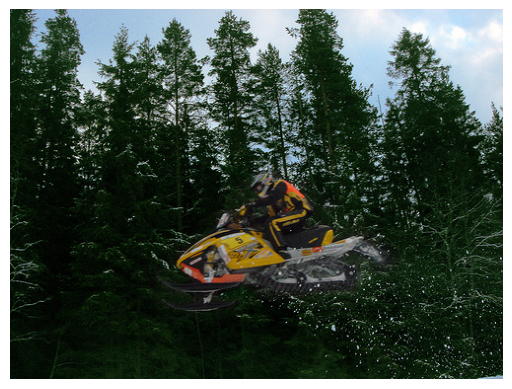

CAPTIONS - 
A person on a snowmobile in mid jump .
A snowmobiler flies through the air .
A snowmobile rider flies through the air on his or her machine in front of tall pine trees .
Rider jumps snowmobile high in rural area .
The man is up in the air .


In [10]:
# Choose a random number, say 50

IMG_PATH = "Images/"
image_id = captions[445].split('.')[0]

img = cv2.imread(IMG_PATH + image_id + ".jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis("off")
plt.show()

print("CAPTIONS - ")
for caption in content[image_id]:
    print(caption)

## Clean the data and save it in a new file

In [11]:
def clean (data):
    # Convert all characters to lower case
    data = data.lower()

    # Convert all non-alphabet characters to ' '
    data = re.sub("[^a-z]+", " ", data)

    return data

In [12]:
print(clean("The white and brown dog is running over the surface of the snow ."))

the white and brown dog is running over the surface of the snow 


In [13]:
for ID, caption_list in content.items():
    for i in range(len(caption_list)):
        content[ID][i] = clean(content[ID][i])

In [14]:
print(content[captions[50].split('.')[0]][-1])

the white and brown dog is running over the surface of the snow 


### Store the cleaned captions in a file "tokens_clean.txt" for future reference

In [15]:
with open ("textFiles/tokens_clean.txt", "w") as file:
    file.write(str(content))